In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# SK-learn libraries for learning.
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

## Import Data

In [2]:
cleaned_df=pd.read_csv('cleaned_wildfire_data.csv').drop(['Unnamed: 0','_id','Event'],axis=1)
cleaned_df.head()

,Latitude,Longitude,Size,log_sizes,size_category,temperature_14,temperature_13,temperature_12,temperature_11,temperature_10,...,windSpeed5,windSpeed6,windSpeed7,windSpeed8,windSpeed9,windSpeed10,windSpeed11,windSpeed12,windSpeed13,windSpeed14
0,33.6681,-117.50139,100.0,4.605170,class_d,48.221250,52.325833,55.353750,52.667083,48.797917,...,3.646667,2.427500,4.275833,1.949583,2.096250,1.935833,1.428750,2.269583,1.633333,1.618333
1,33.0333,-116.83389,25.0,3.218876,class_c,48.305833,46.069583,44.835417,39.776667,37.474167,...,1.526667,1.640417,1.833333,5.261250,4.941250,1.846250,2.011250,7.476250,5.292083,2.992083
2,37.3683,-118.35833,840.0,6.733402,class_e,40.872500,41.335833,49.464583,50.744583,55.579167,...,3.337500,2.846250,5.654583,4.394583,2.933750,2.271250,2.413333,2.819167,5.687500,6.950417
3,33.8692,-117.68361,892.0,6.793466,class_e,55.987500,59.727083,60.797917,62.654167,64.841250,...,5.224583,4.270417,2.530000,4.327917,5.611250,3.257917,3.257083,3.121667,2.863750,2.850417
4,32.8689,-116.86667,15.0,2.708050,class_c,54.468750,53.435833,55.019167,58.447083,62.486667,...,3.899167,4.002500,3.761667,6.027083,3.868333,2.800000,3.557500,3.774583,4.250417,3.922083


In [3]:
# Split data into X's (features) and Y's (labels)
X= cleaned_df.drop(columns='size_category')
y= cleaned_df['size_category']

In [4]:
X

,Latitude,Longitude,Size,log_sizes,temperature_14,temperature_13,temperature_12,temperature_11,temperature_10,temperature_9,...,windSpeed5,windSpeed6,windSpeed7,windSpeed8,windSpeed9,windSpeed10,windSpeed11,windSpeed12,windSpeed13,windSpeed14
0,33.66810,-117.50139,100.0,4.605170,48.221250,52.325833,55.353750,52.667083,48.797917,45.293333,...,3.646667,2.427500,4.275833,1.949583,2.096250,1.935833,1.428750,2.269583,1.633333,1.618333
1,33.03330,-116.83389,25.0,3.218876,48.305833,46.069583,44.835417,39.776667,37.474167,41.516667,...,1.526667,1.640417,1.833333,5.261250,4.941250,1.846250,2.011250,7.476250,5.292083,2.992083
2,37.36830,-118.35833,840.0,6.733402,40.872500,41.335833,49.464583,50.744583,55.579167,47.097083,...,3.337500,2.846250,5.654583,4.394583,2.933750,2.271250,2.413333,2.819167,5.687500,6.950417
3,33.86920,-117.68361,892.0,6.793466,55.987500,59.727083,60.797917,62.654167,64.841250,62.193333,...,5.224583,4.270417,2.530000,4.327917,5.611250,3.257917,3.257083,3.121667,2.863750,2.850417
4,32.86890,-116.86667,15.0,2.708050,54.468750,53.435833,55.019167,58.447083,62.486667,63.624583,...,3.899167,4.002500,3.761667,6.027083,3.868333,2.800000,3.557500,3.774583,4.250417,3.922083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676,34.45282,-118.58139,6049.0,8.707648,74.087500,77.037500,74.795833,71.541667,69.384583,62.819167,...,6.338333,4.172500,4.346667,2.132917,4.606667,1.978750,1.973750,7.612917,2.361250,1.133333
677,34.08222,-118.47528,422.0,6.045005,72.603750,77.289167,75.635000,70.356250,68.434583,61.020000,...,3.350000,1.769167,1.842917,0.922917,1.963333,1.386667,1.410417,4.534167,1.746250,0.946667
678,34.51998,-118.28181,1352.0,7.209340,54.496667,57.502500,58.678333,56.287500,54.127083,54.937917,...,4.163750,3.302500,2.339583,3.526250,4.370000,5.186667,4.914167,5.712083,5.370417,3.529167
679,32.63000,-116.47000,265.0,5.579730,57.593333,56.679167,54.988333,52.771667,57.817083,63.194583,...,2.763750,2.772500,3.166250,3.325833,2.831667,4.111667,4.872083,3.710417,2.650000,2.435833


In [5]:
len(X)

681

In [6]:
len(y)

681

In [7]:
train_d, dev_d, test_d = np.split(X.sample(frac=1, random_state=42), [int(.6*len(X)), int(.8*len(X))])


In [8]:
train_d.head()

,Latitude,Longitude,Size,log_sizes,temperature_14,temperature_13,temperature_12,temperature_11,temperature_10,temperature_9,...,windSpeed5,windSpeed6,windSpeed7,windSpeed8,windSpeed9,windSpeed10,windSpeed11,windSpeed12,windSpeed13,windSpeed14
648,33.68194,-117.39972,188.0,5.236442,73.776667,73.557917,74.040000,73.537917,72.351250,73.099167,...,2.262500,2.112500,1.738333,1.844167,1.837500,1.867083,2.002083,1.996250,1.927917,2.248333
296,34.31100,-117.32200,4100.0,8.318742,64.466667,57.216250,55.025000,50.965417,47.996667,55.321250,...,1.065833,1.405833,2.002500,2.440417,2.578333,2.952917,2.266667,4.623750,2.554167,2.536250
63,36.68390,-119.21611,150.0,5.010635,87.258333,87.747917,84.630417,81.019167,80.775000,81.937500,...,2.191667,1.915000,1.138333,1.995833,1.856250,1.873750,1.972083,1.659583,2.586667,2.278750
320,34.77900,-120.09000,25000.0,10.126631,59.758750,61.035417,62.762083,60.147500,58.266250,60.171250,...,2.471250,1.929167,2.868333,2.996250,2.430833,2.020833,2.118750,2.981250,2.673333,2.871667
101,33.44360,-117.42389,200.0,5.298317,66.606250,64.455833,65.207917,65.526667,65.628333,64.033750,...,1.880000,2.130833,2.150417,2.744167,1.798750,1.590000,1.427917,1.802083,1.683750,1.746250


In [9]:
train_l, dev_l, test_l = np.split(y.sample(frac=1, random_state=42), [int(.6*len(y)), int(.8*len(y))])


In [10]:
train_l.head()

648    class_d
296    class_f
63     class_d
320    class_g
101    class_d
Name: size_category, dtype: object

In [11]:
train_data = train_d.reset_index(drop=True)
test_data = test_d.reset_index(drop=True)
train_labels = train_l.reset_index(drop=True)
test_labels = test_l.reset_index(drop=True)
dev_data = dev_d.reset_index(drop=True)
dev_labels = dev_l.reset_index(drop=True)

In [12]:
train_data.head()

,Latitude,Longitude,Size,log_sizes,temperature_14,temperature_13,temperature_12,temperature_11,temperature_10,temperature_9,...,windSpeed5,windSpeed6,windSpeed7,windSpeed8,windSpeed9,windSpeed10,windSpeed11,windSpeed12,windSpeed13,windSpeed14
0,33.68194,-117.39972,188.0,5.236442,73.776667,73.557917,74.040000,73.537917,72.351250,73.099167,...,2.262500,2.112500,1.738333,1.844167,1.837500,1.867083,2.002083,1.996250,1.927917,2.248333
1,34.31100,-117.32200,4100.0,8.318742,64.466667,57.216250,55.025000,50.965417,47.996667,55.321250,...,1.065833,1.405833,2.002500,2.440417,2.578333,2.952917,2.266667,4.623750,2.554167,2.536250
2,36.68390,-119.21611,150.0,5.010635,87.258333,87.747917,84.630417,81.019167,80.775000,81.937500,...,2.191667,1.915000,1.138333,1.995833,1.856250,1.873750,1.972083,1.659583,2.586667,2.278750
3,34.77900,-120.09000,25000.0,10.126631,59.758750,61.035417,62.762083,60.147500,58.266250,60.171250,...,2.471250,1.929167,2.868333,2.996250,2.430833,2.020833,2.118750,2.981250,2.673333,2.871667
4,33.44360,-117.42389,200.0,5.298317,66.606250,64.455833,65.207917,65.526667,65.628333,64.033750,...,1.880000,2.130833,2.150417,2.744167,1.798750,1.590000,1.427917,1.802083,1.683750,1.746250


Model:\
1) Naive Bayes (Pan)\
    -Bernoulli
    -Multinomial
2) k-nn & K-means (Pauline)
3) Gaussian and PCA (Hannah)
4) Logistic Regression (Cisco)
5) Linear Regression (Josh) (optional)



## Naive Bayes (Pan)

## k-nn & K-means (Pauline)

Producing a k-Nearest-Neighbords model with various k values. Evaluating the performance of the model with a classification report. 

## Gaussian and PCA (Hannah)

## Logistic Regression (Cisco)

## Multinomial Logistic Regression

Now we will use Logistic Regression to model the probability of a certain class.

In [13]:
# Make an instance of the model 

logisticRegr = LogisticRegression()

In [14]:
# Train the model on the train data 

logisticRegr.fit(train_data, train_labels)

/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Measuring Model Performance 

accuracy(fraction of correct predictions): correct predictions / total number of data points

In [15]:
# Predict the labels of dev data
# Uses the information the model learned during the model training process
# Test model accuracy 
    
logisticRegr_pred = logisticRegr.predict(dev_data)
logisticRegr_score = logisticRegr.score(dev_data, dev_labels)
logisticRegr_score

print('For the model that we fit the labels in our dev set are correct: %s' % logisticRegr_score, 'of the time.')

For the model that we fit the labels in our dev set are correct: 0.9632352941176471 of the time.


Where did our model go wrong?

In [16]:
cm = confusion_matrix(dev_labels, logisticRegr_pred)
cm

array([[ 6,  2,  0,  0,  0,  0],
       [ 0, 46,  2,  0,  0,  0],
       [ 0,  0, 26,  0,  0,  0],
       [ 0,  0,  0, 21,  0,  0],
       [ 0,  0,  0,  0, 18,  0],
       [ 0,  0,  0,  0,  1, 14]])

Text(0.5, 1, 'Accuracy score: 0.9632352941176471')

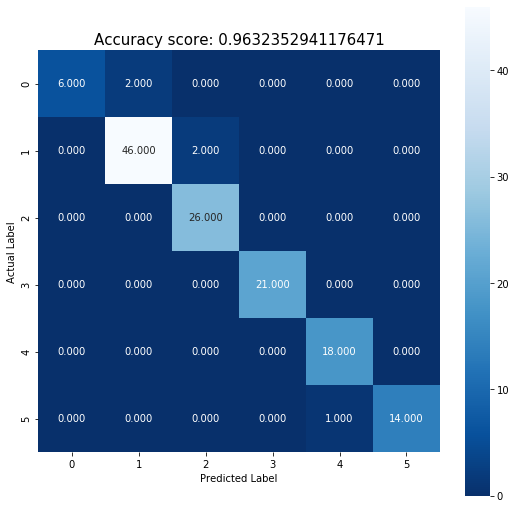

In [17]:
# Confusion matrix with Seaborn 

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", square=True, cmap = 'Blues_r')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
dev_sample_title = 'Accuracy score: {0}'.format(logisticRegr_score)
plt.title(dev_sample_title, size=15)

## Linear Regression (Josh) 